# Introduction

- Judges and officers nationwide are using algorithms to assess criminal defendants' likelihood of re-offending.
- Many states and academics have developed risk assessment algorithms, with two major nationwide tools by commercial vendors.
- Analysis of Northpointe, Inc.'s COMPAS tool revealed **racial bias** in recidivism predictions.
- Larson et al. (2016) studied over 10,000 criminal defendants in Broward County, Florida. The study compared their actual recidivism rates with the rates predicted by the COMPAS software over two years. When defendants are booked into jail, they must complete a COMPAS questionnaire. The responses are used to generate scores such as "Risk of Recidivism" and "Risk of Violent Recidivism."
- COMPAS was 61% accurate in predicting general recidivism, but only 20% accurate for violent recidivism.
- While COMPAS predicted recidivism for black and white defendants at similar rates, it misclassified them differently:
    - Black defendants were often incorrectly judged as high risk (45% misclassified vs. 23% for whites).
    - White defendants more often incorrectly flagged as low risk (48% misclassified vs. 28% for black re-offenders).
- Black defendants were 45% more likely to receive **higher risk** scores than white defendants, even after controlling for various factors (prior crimes, age, gender, future recidivism). 
- Black defendants were twice as likely to be misclassified for higher violent recidivism risk, while white violent recidivists were 63% more likely to be misclassified as low risk.
- When controlling for prior crimes, age, and gender, black defendants were 77% more likely to receive higher scores for violent recidivism risk.

#### Reference:
    Larson, J., Angwin, J., Kirchner, L., &amp; Mattu, S. (2016, May 23). How we analyzed the compas recidivism algorithm. ProPublica. https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm 

In [1]:
# %matplotlib inline

In [42]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('compas.arff')

df = pd.DataFrame(data)
df.sample(10)

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,age_cat_25-45,age_cat_Greaterthan45,age_cat_Lessthan25,race_African-American,race_Caucasian,c_charge_degree_F,c_charge_degree_M
2814,b'1',46.0,0.0,0.0,0.0,2.0,b'1',b'0',b'1',b'0',b'0',b'1',1.0,0.0
828,b'1',24.0,0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'1',b'1',b'0',1.0,0.0
4897,b'0',20.0,0.0,0.0,0.0,0.0,b'1',b'0',b'0',b'1',b'0',b'1',1.0,0.0
2397,b'0',37.0,0.0,0.0,0.0,7.0,b'1',b'1',b'0',b'0',b'0',b'1',1.0,0.0
3948,b'1',23.0,0.0,0.0,0.0,0.0,b'1',b'0',b'0',b'1',b'1',b'0',0.0,1.0
655,b'1',25.0,0.0,0.0,0.0,0.0,b'0',b'1',b'0',b'0',b'1',b'0',0.0,1.0
4681,b'0',19.0,0.0,0.0,0.0,1.0,b'1',b'0',b'0',b'1',b'1',b'0',1.0,0.0
3937,b'0',20.0,0.0,0.0,0.0,0.0,b'1',b'0',b'0',b'1',b'1',b'0',0.0,1.0
5207,b'0',28.0,0.0,0.0,0.0,6.0,b'1',b'1',b'0',b'0',b'1',b'0',0.0,1.0
1144,b'1',57.0,0.0,0.0,0.0,12.0,b'0',b'0',b'1',b'0',b'1',b'0',1.0,0.0


In [7]:
print(meta)

Dataset: compas
	sex's type is nominal, range is ('0', '1')
	age's type is numeric
	juv_fel_count's type is numeric
	juv_misd_count's type is numeric
	juv_other_count's type is numeric
	priors_count's type is numeric
	two_year_recid's type is nominal, range is ('0', '1')
	age_cat_25-45's type is nominal, range is ('0', '1')
	age_cat_Greaterthan45's type is nominal, range is ('0', '1')
	age_cat_Lessthan25's type is nominal, range is ('0', '1')
	race_African-American's type is nominal, range is ('0', '1')
	race_Caucasian's type is nominal, range is ('0', '1')
	c_charge_degree_F's type is numeric
	c_charge_degree_M's type is numeric



In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sex                    5278 non-null   category
 1   age                    5278 non-null   int64   
 2   juv_fel_count          5278 non-null   int64   
 3   juv_misd_count         5278 non-null   int64   
 4   juv_other_count        5278 non-null   int64   
 5   priors_count           5278 non-null   int64   
 6   two_year_recid         5278 non-null   int64   
 7   age_cat_25-45          5278 non-null   object  
 8   age_cat_Greaterthan45  5278 non-null   object  
 9   age_cat_Lessthan25     5278 non-null   object  
 10  race_African-American  5278 non-null   int64   
 11  race_Caucasian         5278 non-null   int64   
 12  c_charge_degree_F      5278 non-null   int64   
 13  c_charge_degree_M      5278 non-null   int64   
dtypes: category(1), int64(10), object(3)
mem

In [51]:
# converting relevant columns to appropriate data types for esay analysis
df['sex'] = df['sex'].astype('category')
df['two_year_recid'] = df['two_year_recid'].astype('int')
df['age'] = df['age'].astype('int')
df['juv_fel_count'] = df['juv_fel_count'].astype('int')
df['juv_misd_count'] = df['juv_misd_count'].astype('int')
df['juv_other_count'] = df['juv_other_count'].astype('int')
df['priors_count'] = df['priors_count'].astype('int')
df['race_African-American'] = df['race_African-American'].astype('int')
df['race_Caucasian'] = df['race_Caucasian'].astype('int')
df['c_charge_degree_F'] = df['c_charge_degree_F'].astype('int')
df['c_charge_degree_M'] = df['c_charge_degree_M'].astype('int')

### Features description:

0. sex: Gender of the individual, encoded as binary.
1. age: Age of the individual.
2. juv_fel_count: Count of juvenile felony charges.
3. juv_misd_count: Count of juvenile misdemeanor charges.
4. juv_other_count: Count of other juvenile charges.
5. priors_count: Count of prior charges.
6. two_year_recid: Indicates whether the individual recidivated within two years, encoded as binary.
7. age_cat_25-45: Indicates whether the age is between 25 and 45, encoded as binary.
8. age_cat_Greaterthan45: Indicates whether the age is greater than 45, encoded as binary.
9. age_cat_Lessthan25: Indicates whether the age is less than 25, encoded as binary.
10. race_African-American: Indicates whether the individual is African-American, encoded as binary.
11. race_Caucasian: Indicates whether the individual is Caucasian, encoded as binary.
12. c_charge_degree_F: Indicates whether the charge degree is felony, encoded as binary.
13. c_charge_degree_M: Indicates whether the charge degree is misdemeanor, encoded as binary.

# Exploratory Data Analysis

First, we'll focus on conducting exploratory data analysis (EDA) on the key features to assess the completeness and validity of the data, and then propose models to predict two_year_recid. During this process, we will also consider potential problems such as fairness and bias in the models, particularly given the context of the data.

The EDA will include:

1. **Data Completeness and Validity Check:** Assessing if there are missing values, outliers, or any inconsistencies in the data.

2. **Descriptive Statistics:** Understanding the distribution of various features such as age, race, gender, prior counts, etc.

3. **Correlation Analysis:** Examining how different features are related to each other and to the target variable two_year_recid.

4. **Comparative Analysis by Race and Gender:** Exploring how recidivism rates and other factors differ across racial groups and genders.


I'll first check for data completeness and validity, and then proceed to provide descriptive statistics and conduct correlation analysis.

## [1] Data Completeness and Validity Check:

In [53]:
missing_values = df.isnull().sum()

unique_values = df.nunique()

descriptive_stats = df.describe()

# decode the byte strings for the categorical summaries to make them more readable.
# don't mind the syntax! this is called Dict Comprehension, and lambda is an anonymous function
categorical_summary = {attr: df[attr].apply(lambda x: x.decode('utf-8')).value_counts() for attr in df.columns if df.dtypes[attr] == 'object'}

print("*Missing values:* \n", missing_values, "\n")
print("*Unique values:* \n", unique_values, "\n")
print("*Descriptive Statistics:* \n" , pd.DataFrame(descriptive_stats), "\n")
print("*Catergorical_summary:* \n", pd.DataFrame(categorical_summary))

*Missing values:* 
 sex                      0
age                      0
juv_fel_count            0
juv_misd_count           0
juv_other_count          0
priors_count             0
two_year_recid           0
age_cat_25-45            0
age_cat_Greaterthan45    0
age_cat_Lessthan25       0
race_African-American    0
race_Caucasian           0
c_charge_degree_F        0
c_charge_degree_M        0
dtype: int64 

*Unique values:* 
 sex                       2
age                      62
juv_fel_count             9
juv_misd_count           10
juv_other_count           8
priors_count             36
two_year_recid            2
age_cat_25-45             2
age_cat_Greaterthan45     2
age_cat_Lessthan25        2
race_African-American     2
race_Caucasian            2
c_charge_degree_F         2
c_charge_degree_M         2
dtype: int64 

*Descriptive Statistics:* 
                age  juv_fel_count  juv_misd_count  juv_other_count  \
count  5278.000000    5278.000000     5278.000000      5278.000

Key observations:

1. Data Completeness: There are no missing values in any of the columns.
2. Descriptive Statistics:
    - The average age of defendants is approximately 34 years.
    - Juvenile felony, misdemeanor, and other counts are generally low (mean = 0.27) but with some outliers (max values up to 10, 13, and 7, respectively).
    - Priors count has a wide range (0 to 38, mean = 3.46).
    - The charge degree is predominantly felony (65.18%).
    - Demographics distribtution (African-American defendants = 3175, Cacucasian Defendants = 2103).

Next, we'll conduct correlation analysis to understand how different features correlate with each other and particularly with the target variable two_year_recid. This will help us identify which features are most strongly associated with recidivism and should therefore be a focus in our predictive modeling. Additionally, we'll conduct a comparative analysis by race and gender to explore any disparities.

### Analyzing recidivism rates

In [56]:

recidivism_rates = df.groupby(['race_African-American', 'race_Caucasian'])['two_year_recid'].mean()
recidivism_rates

race_African-American  race_Caucasian
0                      1                 0.39087
1                      0                 0.52315
Name: two_year_recid, dtype: float64


- African-American Defendants: 52.32%
- Caucasian Defendants: 39.09%

These initial findings indicate that in this dataset, African-American defendants have a higher rate of recidivism as recorded.

To understand the context of these numbers, we'll analyze factors like charge severity, and prior charges.

### Charge severity by race

In [54]:
charge_severity_by_race = df.groupby(['race_African-American', 'race_Caucasian'])[['c_charge_degree_F', 'c_charge_degree_M']].mean()
charge_severity_by_race

,,c_charge_degree_F,c_charge_degree_M
race_African-American,race_Caucasian,,
0,1,0.591536,0.408464
1,0,0.691654,0.308346


#### Caucasian Defendants:
- Felonies: 59.15%
- Misdemeanors: 40.85%

#### African-American Defendants:
- Felonies: 69.17%
- Misdemeanors: 30.83%

This data shows that African-American defendants in this dataset are more likely to be charged with felonies compared to Caucasian defendants.

### Prior charges and recidivism rates

In [63]:
# analyzing the relationship between prior charges and recidivism rates across races
prior_charges_recidivism = df.groupby(['race_African-American', 'race_Caucasian', 'priors_count'])['two_year_recid'].mean().reset_index()
prior_charges_recidivism.sample(5)

(64, 4)


,race_African-American,race_Caucasian,priors_count,two_year_recid
7,0,1,7,0.682927
31,1,0,1,0.423573
13,0,1,13,0.727273
32,1,0,2,0.510769
44,1,0,14,0.756757


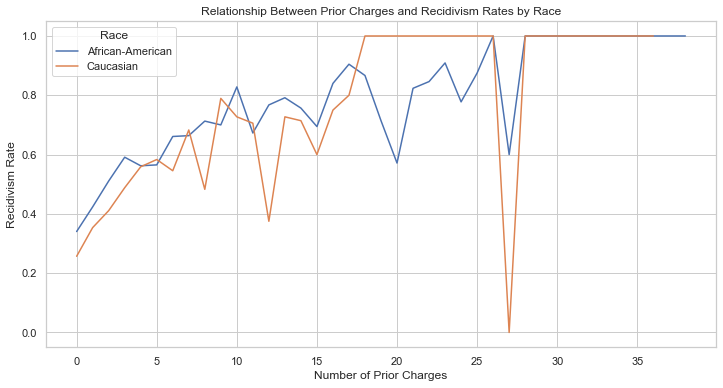

In [60]:
# plotting the relationship between prior charges and recidivism rates for different races
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=prior_charges_recidivism[prior_charges_recidivism['race_African-American'] == 1], 
             x='priors_count', y='two_year_recid', label='African-American')
sns.lineplot(data=prior_charges_recidivism[prior_charges_recidivism['race_Caucasian'] == 1], 
             x='priors_count', y='two_year_recid', label='Caucasian')

plt.title('Relationship Between Prior Charges and Recidivism Rates by Race')
plt.xlabel('Number of Prior Charges')
plt.ylabel('Recidivism Rate')
plt.legend(title='Race')
plt.show()

This pattern suggests a positive correlation between the number of prior charges and the likelihood of recidivism. However, this is a generalized view and does not account for other factors that might influence recidivism.

## [2] Descriptive Statistics

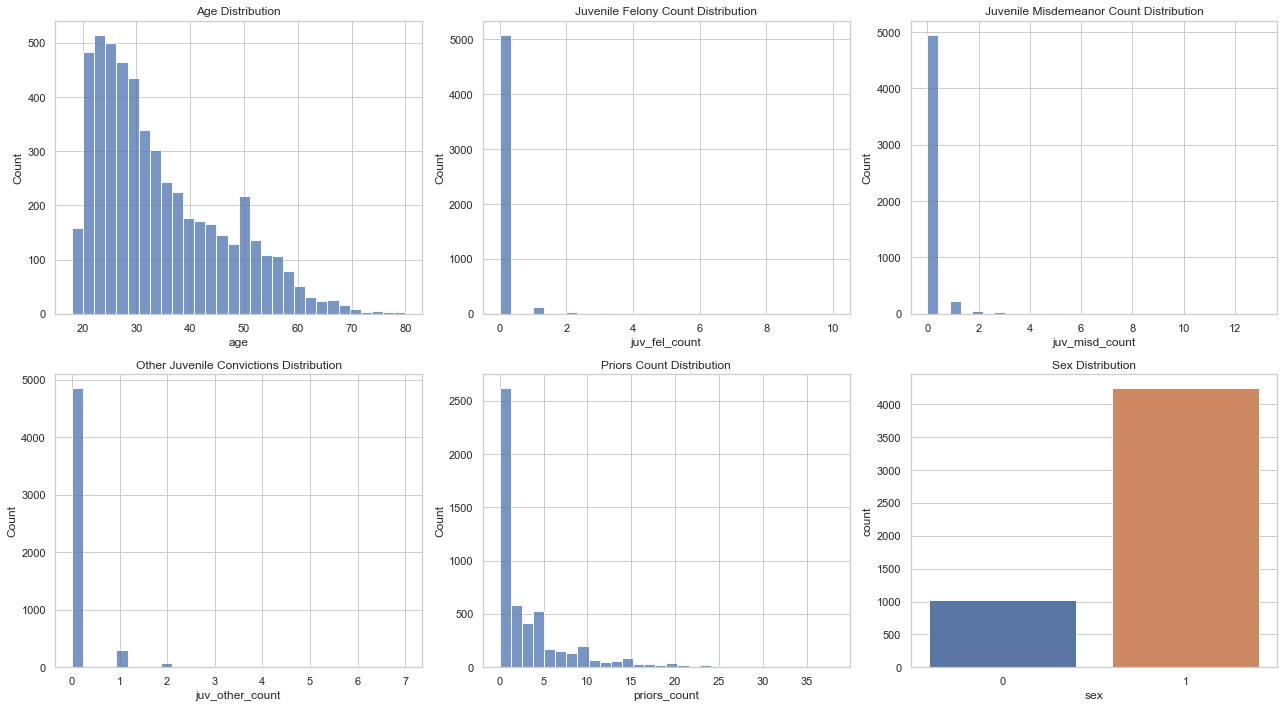

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(df['age'], bins=30, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['juv_fel_count'], bins=30, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Juvenile Felony Count Distribution')

sns.histplot(df['juv_misd_count'], bins=30, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Juvenile Misdemeanor Count Distribution')

sns.histplot(df['juv_other_count'], bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Other Juvenile Convictions Distribution')

sns.histplot(df['priors_count'], bins=30, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Priors Count Distribution')

sns.countplot(x=df['sex'].apply(lambda x: x.decode('utf-8')), ax=axes[1, 2])
axes[1, 2].set_title('Sex Distribution')

plt.tight_layout()
plt.show()

- **Age**: The distribution of age appears to be slightly right-skewed, with a concentration of younger individuals in the dataset.
- **Juvenile Felony Count**: The vast majority of individuals have no juvenile felony counts, with very few having one or more counts.
- **Juvenile Misdemeanor Count**: Similar to juvenile felony counts, most individuals have zero counts.
- **Other Juvenile Convictions**: Again, the majority have zero, with a small number having one or more.
- **Prior Convictions Count:** This distribution is more spread out, with a higher frequency at the lower count values, indicating that most individuals have a few or no prior convictions, but there are some with a high number of prior convictions.
- **Sex:** The bar plot indicates that there are more males coded as '1' than females coded as '0'.

## [3] Correlation Analysis

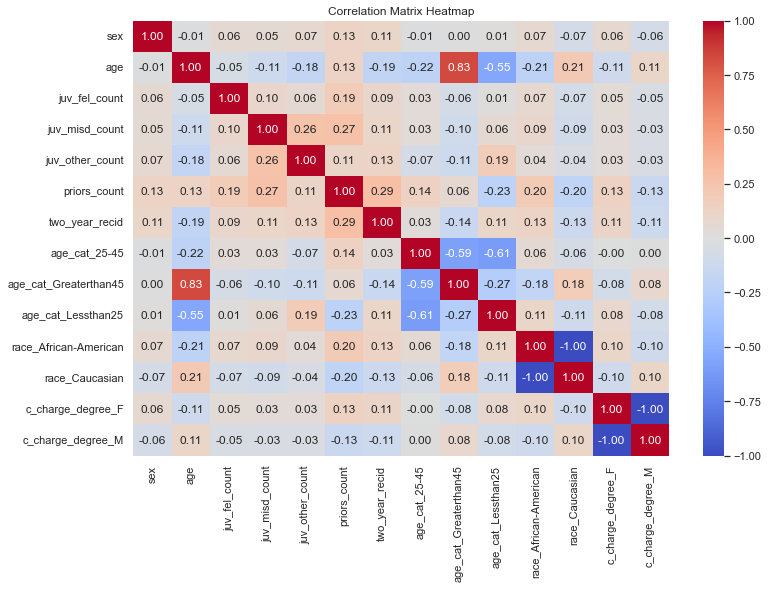

In [66]:
# compute the correlation matrix for the numerical and binary variables
correlation_matrix = df.apply(lambda x: x.astype(float)).corr()

# plot the heatmap of the corr matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

We observe the following:
- As expected, age shows strong negative correlations with the age_cat_Lessthan25 variable and strong positive correlations with the age_cat_Greaterthan45 variable. This is logical since these are directly derived from the age.
- The priors_count has a moderate positive correlation (29%) with the two_year_recid variable, suggesting that *individuals with more prior convictions are more likely to recidivate within two years.*
- The c_charge_degree_F (felony) and c_charge_degree_M (misdemeanor) are perfectly negatively correlated (-1.00), which is expected since these are complementary binary variables (if one is 0, the other is 1, and vice versa).

Most other correlations are **relatively weak**, indicating no strong linear relationship between those pairs of variables.

Next, we should conduct a comparative analysis by race and gender to explore disparities in recidivism rates and other factors.

## [4] Comparative Analysis by Race and Gender

This analysis will focus on the distribution of key features and recidivism rates across different racial groups and between genders. This step is crucial for understanding any inherent biases in the data, which can inform our approach to modeling and fairness considerations

In [79]:
# Creating a new column for race as a categorical variable
df['race'] = 'Other'
df.loc[df['race_African-American'] == 1, 'race'] = 'African-American'
df.loc[df['race_Caucasian'] == 1, 'race'] = 'Caucasian'
df['race'] = df['race'].astype('category')

df['sex'] = df['sex'].astype(int)

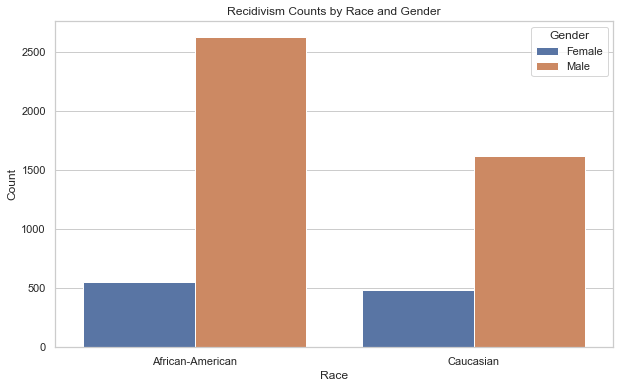

In [89]:
# plotting recidivism rates by race and gender
plt.figure(figsize=(10, 6))

sns.countplot(x='race', hue='sex', data=df)

plt.title('Recidivism Counts by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()


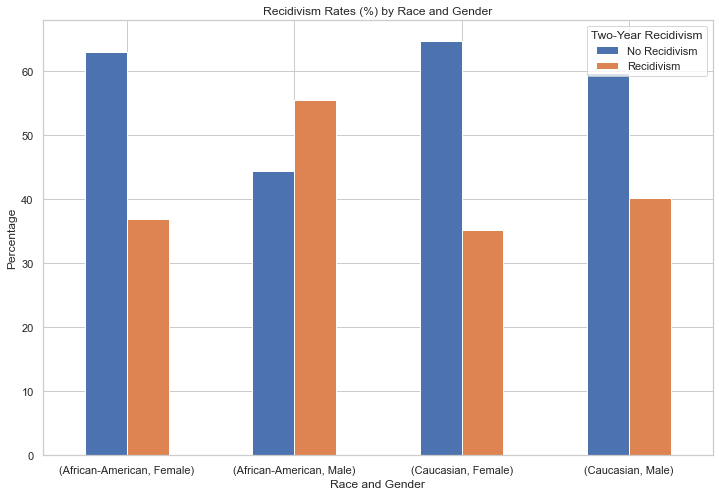

In [93]:
df['gender'] = 'Other'
df.loc[df['sex'] == 1, 'gender'] = 'Male'
df.loc[df['sex'] == 0, 'gender'] = 'Female'
df['gender'] = df['gender'].astype('category')

# creating a DataFrame for recidivism rates by race and gender
recidivism_rates = df.groupby(['race', 'gender'])['two_year_recid'].value_counts(normalize=True).unstack()
recidivism_rates = recidivism_rates.multiply(100)  # converting to percentages

# plotting recidivism rates
plt.figure(figsize=(12, 8))
recidivism_rates.plot(kind='bar', ax=plt.gca())

plt.title('Recidivism Rates (%) by Race and Gender')
plt.xlabel('Race and Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Two-Year Recidivism', labels=['No Recidivism', 'Recidivism'])

plt.show()


#### Recidivism by Age Group

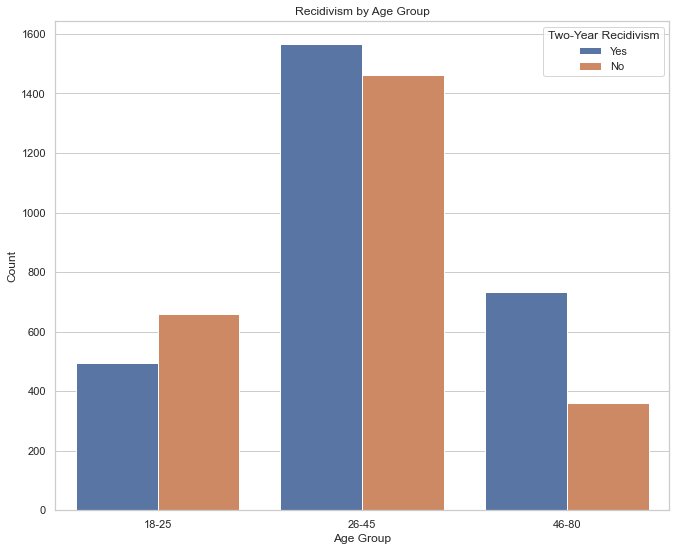

In [91]:
# Creating a new column for age groups for easier visualization
bins = [18, 25, 45, 80]
labels = ['18-25', '26-45', '46-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

fig, ax = plt.subplots(figsize=(11, 9))

sns.countplot(data=df, x='age_group', hue='two_year_recid', ax=ax)
ax.set_title('Recidivism by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Two-Year Recidivism', labels=['Yes', 'No'])

plt.show()